<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista2_Simula%C3%A7%C3%A3oEstoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1ª Questão Letra A:

In [5]:
%pip install simpy

In [6]:
import numpy as np
import simpy as sp

In [7]:

class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")


def gera_chegadas(env, fila_mm1):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 1.6820560310148294, tamanho da fila = 1
Cliente 1 saiu em 1.8116530208247608, tamanho da fila = 0
Cliente 2 chegou à fila em 2.693077486294081, tamanho da fila = 1
Cliente 3 chegou à fila em 2.758398790903418, tamanho da fila = 2
Cliente 4 chegou à fila em 3.0424629251881146, tamanho da fila = 3
Cliente 5 chegou à fila em 3.2371298503682557, tamanho da fila = 4
Cliente 6 chegou à fila em 3.3156362764246774, tamanho da fila = 5
Cliente 2 saiu em 3.716111531628083, tamanho da fila = 4
Cliente 7 chegou à fila em 3.8225315082253473, tamanho da fila = 5
Cliente 8 chegou à fila em 4.698446891049644, tamanho da fila = 6
Cliente 3 saiu em 5.13611947003987, tamanho da fila = 5
Cliente 4 saiu em 5.524771541071026, tamanho da fila = 4
Cliente 5 saiu em 5.664428083708282, tamanho da fila = 3
Cliente 9 chegou à fila em 5.712100230719171, tamanho da fila = 4
Cliente 6 saiu em 6.105539476219921, tamanho da fila = 3
Cliente 10 chegou à fila em 6.55467807721552, tamanho da fi

#1ª Questão Letra B:

In [8]:
import simpy
import random
global i
i = 0
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        global i
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, iteração = {i}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            i = i + 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, iteração = {i}")

def tam_media(vetor):
  if len(vetor) == 0: return 0
  return sum(vetor)/len(vetor)

def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        media_old = tam_media(fila_mm1.vetor_n)
        vetor = [1]
        vetor_2 = fila_mm1.vetor_n
        result = vetor + vetor_2
        media_new = tam_media(result)
        if abs(media_new - media_old) <= 0.0004: break
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=100)


Cliente 1 chegou à fila em 0.10200391351071862, tamanho da fila = 1, iteração = 1
Cliente 1 saiu em 0.31560482813673335, tamanho da fila = 0, iteração = 2
Cliente 2 chegou à fila em 1.2309348027401963, tamanho da fila = 1, iteração = 3
Cliente 2 saiu em 1.3542065914641077, tamanho da fila = 0, iteração = 4
Cliente 3 chegou à fila em 1.5202552299040875, tamanho da fila = 1, iteração = 5
Cliente 3 saiu em 2.1360009244964484, tamanho da fila = 0, iteração = 6
Cliente 4 chegou à fila em 2.9827827977867756, tamanho da fila = 1, iteração = 7
Cliente 4 saiu em 3.399946022123298, tamanho da fila = 0, iteração = 8
Cliente 5 chegou à fila em 3.8737304389657288, tamanho da fila = 1, iteração = 9
Cliente 5 saiu em 4.196772081069226, tamanho da fila = 0, iteração = 10
Cliente 6 chegou à fila em 4.468701247172436, tamanho da fila = 1, iteração = 11
Cliente 7 chegou à fila em 4.559693328551889, tamanho da fila = 2, iteração = 12
Cliente 6 saiu em 4.745942621206879, tamanho da fila = 1, iteração = 13


#2ª Questão Letra A:

In [15]:

class FilaMMC:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMC(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)
vetor_n = fila.vetor_n
vetor_a = fila.vetor_a

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.6239937417839554, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.66201937489492, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.9901589851128597, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 1.0171890557734273, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 saiu em 1.0924012525557618, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 2 saiu em 1.410542942230898, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 2.695774853506069, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 2.730723618710488, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 3.8510977865017826, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 saiu em 3.8658867669523125, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 4.9275496909252405, tamanho da fila = 1, Pessoas em atendimento = 0
Clien

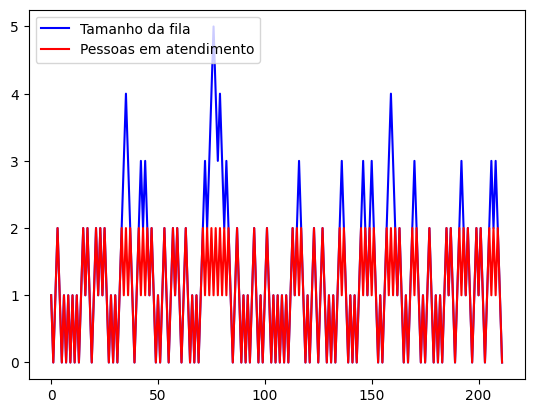

In [16]:
# Plot do tamanho da fila e a quantidade de pessoas em atendimento
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(vetor_n))]
aux.plot(eixo_x, vetor_n, color = 'blue', label = 'Tamanho da fila')
aux.legend(loc='upper left')
aux.plot(eixo_x, vetor_a, color = 'red', label = 'Pessoas em atendimento')
aux.legend(loc='upper left')
plt.show()

# 2ª Questão Letra B:

In [68]:
vetor = []

In [69]:

class FilaMMCB:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.taxa_de_uti = 0
        self.tempo_total_do_sistema = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        self.tempo_total_do_sistema.append(self.env.now)
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            tempo_inicial = self.env.now
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            tempo_final = self.env.now
            self.taxa_de_uti = self.taxa_de_uti + (tempo_final - tempo_inicial)
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}, tempo de atendimento = {tempo_final - tempo_inicial}")
            self.tempo_total_do_sistema.append(self.env.now)

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')

Cliente 1 chegou à fila em 0.12121846466373522, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.23783659342078925, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.11661812875705403
Cliente 2 chegou à fila em 0.8055454621157486, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 saiu em 0.9275612050604304, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.12201574294468176
Cliente 3 chegou à fila em 2.1589885258841712, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 saiu em 2.3313841224087, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.17239559652452874
Cliente 4 chegou à fila em 2.4450372218474405, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 2.549964498311015, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.10492727646357425
Cliente 5 chegou à fila em 2.7266904329530615, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 1**

In [70]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=1, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.09057411160107914, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.5927707953630599, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 1 saiu em 0.6736978652226504, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.5831237536215712
Cliente 3 chegou à fila em 0.7638998604828008, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 4 chegou à fila em 0.8020633313761012, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.9571359326565848, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 6 chegou à fila em 1.092686020140097, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 1.5455508990618207, tamanho da fila = 6, Pessoas em atendimento = 2
Cliente 8 chegou à fila em 2.1908547408891708, tamanho da fila = 7, Pessoas em atendimento = 2
Cliente 9 chegou à fila em 2.544121643099561, tamanho da fila = 8, Pessoas em atendimento = 2
Cliente 10 chegou

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 2**

In [71]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=2, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.21015778613640076, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.301813038815418, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.09165525267901722
Cliente 2 chegou à fila em 0.44381307106652557, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 0.514893731725667, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 saiu em 0.6877085779398437, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.17281484621417675
Cliente 4 chegou à fila em 0.7001847308474626, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 chegou à fila em 0.8038429211787423, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 6 chegou à fila em 1.1838029481853258, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 2 saiu em 1.2974355915858262, tamanho da fila = 3, Pessoas em atendimento = 1, tempo de atendimento = 0.8536225205193007
Cliente 7 chegou à fila em 1.469577250011

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 3**

In [72]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.08555371855375267, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.1389625985376161, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 0.23930792773663695, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.10034532919902084
Cliente 1 saiu em 0.3082010365514024, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.22264731799764975
Cliente 3 chegou à fila em 0.5069105781805621, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 saiu em 0.6011658533532769, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.09425527517271481
Cliente 4 chegou à fila em 0.7363803971264091, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 0.7457480171114477, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 6 chegou à fila em 0.7510189378688056, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 0.909306317

**Comparação**

In [74]:
print(f'Em todos os casos analisados definimos o número de atendentes = 2')
print(f'taxa de utilização = {vetor[0]}% para taxa de chegada = 5 e taxa de atendimento = 1')
print(f'taxa de utilização = {vetor[1]}% para taxa de chegada = 5 e taxa de atendimento = 2')
print(f'taxa de utilização = {vetor[2]}% para taxa de chegada = 5 e taxa de atendimento = 3')

Em todos os casos analisados definimos o número de atendentes = 2
taxa de utilização = 97.72481071870354% para taxa de chegada = 5 e taxa de atendimento = 1
taxa de utilização = 93.64200826058116% para taxa de chegada = 5 e taxa de atendimento = 2
taxa de utilização = 86.95652743624827% para taxa de chegada = 5 e taxa de atendimento = 3


#3ª Questão

In [13]:
# Fila implementada para termos dois tipos de clientes(normal e prioritário)
class FilaMM1:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0

    def chegada_cliente(self, cliente, prio, tipo_cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        if tipo_cliente == 'P':
          print(f"Cliente {cliente}(Prioritário) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        else:
          print(f"Cliente {cliente}(Normal) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")


def gera_chegadas(env, fila_mm1):
    cliente = 0
    prio = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        tipo_cliente = np.random.choice(['N', 'P']) # Define se o cliente é normal ou prioritário
        if tipo_cliente == 'P':
            prio = prio + 1
            env.process(fila_mm1.chegada_cliente(cliente, prio, tipo_cliente))
        else:
            env.process(fila_mm1.chegada_cliente(cliente, 1000000000000, tipo_cliente))


env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)
fila = FilaMM1(env, res, taxa_chegada=5, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1(Normal) chegou à fila em 0.03750494742581588, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2(Normal) chegou à fila em 0.05168650880654505, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3(Prioritário) chegou à fila em 0.053036478157072416, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 4(Prioritário) chegou à fila em 0.07759781140481375, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 5(Prioritário) chegou à fila em 0.44615121141668046, tamanho da fila = 5, Pessoas em atendimento = 1
Cliente 1 saiu em 0.6283207385115258, tamanho da fila = 4
Cliente 6(Prioritário) chegou à fila em 0.6826313968718217, tamanho da fila = 5, Pessoas em atendimento = 1
Cliente 7(Prioritário) chegou à fila em 0.8296163357246016, tamanho da fila = 6, Pessoas em atendimento = 1
Cliente 8(Normal) chegou à fila em 0.832829268855776, tamanho da fila = 7, Pessoas em atendimento = 1
Cliente 9(Normal) chegou à fila em 1.2492980511418268, tamanho da fila = 8, Pessoas em a

#4ª Questão Letra A:

In [17]:
# Sistema implemntado para temos um limite de 10 pessoas.
class FilaMM1K:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")


def gera_chegadas(env, fila_mm1k, limite_sistema):
    cliente = 0
    limite = limite_sistema
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1k.taxa_chegada))
        cliente += 1
        if (fila_mm1k.tamanho_da_fila + fila.qtd_atendimento) >= limite_sistema: # Quantidade de pessoas que estão na fila mais a quantidade de pessoas que estão em atendimento
          print(f'O sistema está lotado e o cliente {cliente} foi rejeitado')
        else:
          env.process(fila_mm1k.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1K(env, res, taxa_chegada=3, taxa_servico=3)
limite_sistema = 10 # Variável que define a quantidade máxima de pessoas que podem está no nosso sistema
env.process(gera_chegadas(env, fila, limite_sistema))

env.run(until=100)


Cliente 1 chegou à fila em 0.001829897316794101, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.03259846540765975, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.261084621901248, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 4 chegou à fila em 0.28802776183510914, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 1 saiu em 0.7106554594697863, tamanho da fila = 3, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 0.7115874195105942, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 2 saiu em 0.7788618391528581, tamanho da fila = 3, Pessoas em atendimento = 0
Cliente 3 saiu em 1.6575660512467694, tamanho da fila = 2, Pessoas em atendimento = 0
Cliente 4 saiu em 1.7305335967829163, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 1.8037199415182636, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 1.8189745722989725, tamanho da fila = 1, Pessoas em atendimento =

# 5ª Questão

In [25]:
# Fila MMC modificada para atender um cliente aleatório que está fila
class FilaMMCA:
    def __init__(self, env, res, c, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.PriorityResource(env, capacity=c)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente, prio):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmca):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmca.taxa_chegada))
        cliente += 1
        prio = random.randint(0, 1000000000000000000000) # Definimos a prioridade de um cliente com um número inteiro aleatório
        env.process(fila_mmca.chegada_cliente(cliente, prio))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=c)
fila = FilaMMCA(env, res, c, taxa_chegada=2, taxa_servico=3)


env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.3973053287820716, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.5836265254836287, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 1 saiu em 0.6932444347204074, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.723292474074983, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 0.8702851048116715, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 saiu em 0.9466646920344569, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 1.0790937135756946, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 1.1924727872938403, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 1.4571909075573835, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 1.556724534507335, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 1.6823563797348076, tamanho da fila = 1, Pessoas em atendimento = 1
Cl

8